In [1]:
#import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import dask.dataframe as dd
from IPython.display import display, HTML
import pandas as pd
import cudf

In [2]:
df = pd.read_parquet('processed_data.parquet')

ddf = cudf.from_pandas(df) # If ddf is a Dask DataFrame

In [2]:
recommended_count = ddf[ddf['activation'] == 1].shape[0]
print("Number of activation instances:", recommended_count)

data_len = len(ddf)
print("Number of records:", data_len)


NameError: name 'ddf' is not defined

In [18]:
unique_merchant_profile1 = ddf['merchant_profile_01'].nunique()
unique_merchant_profile1

71

In [1]:
def print_missing_values(ddf):
    missing_values_summary_cudf = ddf.isnull().sum()
    missing_values_percentage_cudf = (ddf.isnull().sum() / len(ddf)) * 100
    
    # Creating a DataFrame to display the summary and percentage of missing values for each column
    missing_values_df_cudf = cudf.DataFrame({
        'Missing Values': missing_values_summary_cudf,
        'Percentage (%)': missing_values_percentage_cudf
    }).sort_values(by='Percentage (%)', ascending=False)
    
    missing_values_df_pd = missing_values_df_cudf.to_pandas()
    
    # Set pandas options for display (adjust these numbers as per your need)
    pd.set_option('display.max_rows', 100)  # or another number large enough
    pd.set_option('display.max_columns', 100)  # Adjusting to show more columns
    
    # Display the DataFrame
    print(missing_values_df_pd)

#print_missing_values(ddf)

In [29]:
columns_of_interest = ddf[['customer_merchant_02', 'customer_digital_activity_18', 'ind_recommended', 'activation']]

# Drop rows with null values in these columns to avoid issues with correlation calculation
columns_of_interest = columns_of_interest.dropna()

# Calculate the correlation matrix
correlation_matrix = columns_of_interest.to_pandas().corr()

# Extract the correlations of 'customer_merchant_02' with 'ind_recommended' and 'activation'
correlation_with_ind_recommended = correlation_matrix.loc['customer_merchant_02', 'ind_recommended']
correlation_with_activation = correlation_matrix.loc['customer_merchant_02', 'activation']

print("Correlation of customer_merchant_02 with ind_recommended:", correlation_with_ind_recommended)
print("Correlation of customer_merchant_02 with activation:", correlation_with_activation)

correlation_with_ind_recommended = correlation_matrix.loc['customer_digital_activity_18', 'ind_recommended']
correlation_with_activation = correlation_matrix.loc['customer_digital_activity_18', 'activation']

print("Correlation of customer_digital_activity_18 with ind_recommended:", correlation_with_ind_recommended)
print("Correlation of customer_digital_activity_18 with activation:", correlation_with_activation)

Correlation of customer_merchant_02 with ind_recommended: 0.06296330905488583
Correlation of customer_merchant_02 with activation: 0.1282142571093371
Correlation of customer_digital_activity_18 with ind_recommended: -0.1668742884375606
Correlation of customer_digital_activity_18 with activation: -0.07284656523897826


## Outlier removal result in problematic df

In [3]:
columns_to_remove = [
    'customer_merchant_02', 'customer_merchant_01',
    'customer_digital_activity_07', 'customer_digital_activity_08',
    'customer_digital_activity_09', 'customer_digital_activity_18', 'customer', 'merchant'
]

# Assuming 'data' is your cuDF DataFrame
ddf.drop(columns=columns_to_remove, inplace=True)

ddf.to_parquet()

In [2]:
# import cudf

# def remove_outliers(df, exclude_columns):
#     for column in df.columns:
#         if column in exclude_columns:
#             continue  # Skip the excluded columns
        
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
        
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#         num_outliers = len(outliers)
#         print(f"Column '{column}' has {num_outliers} outliers")
        
#         # Removing outliers
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
#     return df

# # Example usage
# exclude_columns = ['ind_recommended', 'merchant_profile_01', 'customer', 'merchant', 'activation']
# ddf = remove_outliers(ddf, exclude_columns=exclude_columns)

In [11]:
# import cudf
# from cuml.preprocessing import MinMaxScaler
# import os

# def scale_and_save_by_column(df, exclude_columns, save_directory, progress_file, start_index=0):
#     scaler = MinMaxScaler()

#     if not os.path.exists(save_directory):
#         os.makedirs(save_directory)

#     progress_path = os.path.join(save_directory, progress_file)
#     if os.path.exists(progress_path):
#         with open(progress_path, "r") as f:
#             start_index = int(f.read().strip())
#         df = cudf.read_parquet(os.path.join(save_directory, f'scaled_data_{start_index}.parquet'))
#     else:
#         start_index = 0

#     columns_to_scale = [col for col in df.columns if col not in exclude_columns]

#     for i, column in enumerate(columns_to_scale[start_index:], start=start_index):
#         non_nulls = df[column].dropna()
#         if len(non_nulls) > 0:
#             # Convert to DataFrame for scaling and keep original index
#             non_nulls_df = non_nulls.to_frame().reset_index()
#             scaled_values_df = scaler.fit_transform(non_nulls_df[[column]])
#             # Merge scaled values back using original index
#             merged_df = cudf.DataFrame({'index': non_nulls_df['index'], 'scaled_value': scaled_values_df[column]})
#             df = df.merge(merged_df, on='index', how='left')
#             df[column] = df['scaled_value']
#             df = df.drop(columns=['scaled_value'])

#         # Save progress after each column is scaled
#         df.to_parquet(os.path.join(save_directory, f'scaled_data_{i+1}.parquet'))
#         with open(progress_path, "w") as f:
#             f.write(str(i+1))
#         print(f"Column '{column}' scaled and progress saved. Processed {i+1} out of {len(columns_to_scale)}")

#     print("All columns scaled and progress saved.")

# # Usage example:
# exclude_columns = ['merchant_profile_01', 'customer', 'merchant']
# save_directory = 'scaled_data_progress'
# progress_file = 'progress.txt'

# scale_and_save_by_column(ddf, exclude_columns, save_directory, progress_file)


KeyError: 'index'

In [6]:
ddf.head()

ind_recommended  activation customer_digital_activity_04  \
__null_dask_index__                                                             
0                                  0           0                         <NA>   
1                                  0           0                         <NA>   
2                                  0           0                         <NA>   
3                                  0           0                         <NA>   
4                                  1           0                         <NA>   

                     customer_spend_01 customer_industry_spend_01  \
__null_dask_index__                                                 
0                           107.215862                 26.6865942   
1                            35.552000                50.92826087   
2                            31.623103                48.83787234   
3                           112.277391                       <NA>   
4                           448.427273                       <NA>   

                    customer_industry_spend_02 customer_industry_spend_03  \
__null_dask_index__                                                         
0                                         74.0                    3682.75   
1                                          3.0                    1171.35   
2                                         19.0                    2295.38   
3                                         <NA>                       <NA>   
4                                         <NA>                       <NA>   

                    customer_industry_spend_04 customer_industry_spend_05  \
__null_dask_index__                                                         
0                                        138.0                      111.0   
1                                         23.0                       17.0   
2                                         47.0                       42.0   
3                                         <NA>                       <NA>   
4                                         <NA>                       <NA>   

                     customer_spend_02  ...  merchant_spend_09  \
__null_dask_index__                     ...                      
0                                 14.0  ...            49466.0   
1                                  2.0  ...             3638.0   
2                                 11.0  ...             3912.0   
3                                 16.0  ...            28919.0   
4                                  5.0  ...             1086.0   

                     merchant_profile_03  customer_digital_activity_01  \
__null_dask_index__                                                      
0                                65923.0                      0.000000   
1                                 7801.0                      0.419355   
2                                12868.0                      0.836364   
3                                23553.0                      0.952381   
4                                  308.0                      0.754386   

                     merchant_spend_10  customer_profile_03  \
__null_dask_index__                                           
0                               29.180            58.434969   
1                               28.465             5.392089   
2                              421.500            33.780445   
3                               50.000            37.340085   
4                               69.509            77.794164   

                     customer_digital_activity_02  customer_profile_04  \
__null_dask_index__                                                      
0                                       32.500000                 86.0   
1                                        7.000000                125.0   
2                                        0.000000                180.0   
3                                       28.666667                134.0   
4                    

In [3]:
#import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import dask.dataframe as dd
from IPython.display import display, HTML
import pandas as pd
import cudf

In [2]:
from cuml.linear_model import LinearRegression, LogisticRegression
import cudf
import numpy as np
import gc
import cupy as cp

def regression_impute_column(df, target_column, is_categorical=False):
    """
    Impute missing values in a specific column using regression models.
    
    Parameters:
    df (cudf.DataFrame): The input dataframe.
    target_column (str): The name of the column to impute.
    is_categorical (bool): Flag to indicate if the target column is categorical.
    """
    print("Preparing data...")
    #df = df.copy()
    
    # Split the dataframe into rows with and without missing values in the target column
    df_with_values = df[df[target_column].notnull()]
    df_missing_values = df[df[target_column].isnull()]

    if len(df_missing_values) == 0:
        print("No imputation needed.")
        return df  # No imputation needed if no missing values

    X_train = df_with_values.drop(columns=[target_column]).fillna(0)
    y_train = df_with_values[target_column]
    X_missing = df_missing_values.drop(columns=[target_column]).fillna(0)
    
    # Choose the model based on the data type
    if is_categorical:
        model = LogisticRegression()
    else:
        model = LinearRegression()
        
    print("Start imputing...")
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the missing values
    predicted_values = model.predict(X_missing)
    
    # Update the DataFrame with imputed values
    df.loc[df[target_column].isnull(), target_column] = predicted_values
    return df

# i = 0
# numerical_categories = numerical_categories[i+1:]
# for col in numerical_categories:
#     i +=1
#     df = regression_impute_column(df, col, is_categorical=False)
#     print(f'Successfully imputed values for numerical column: {col}')
#     if i == 15: 
#         df.to_parquet('imputed_df' + str(i) + '.parquet')
#         break

# def 


# df = regression_impute_column(df, "merchant_profile_01", is_categorical=True)
# print(f'Successfully imputed values for categorical column: {col}')

In [3]:
def batch_impute_and_save(df, numerical_categories, start_index=0, batch_size=10, base_filename='imputed_df'):
    """
    Perform imputation on batches of columns and save intermediate results.
    
    Args:
    df (cudf.DataFrame): The DataFrame to impute.
    numerical_categories (list): List of columns to impute.
    start_index (int): Column index to start imputation.
    batch_size (int): Number of columns to impute per batch.
    base_filename (str): Base name for saving intermediate Parquet files.
    
    Returns:
    int: Index of the last column processed.
    """
    for i, col in enumerate(numerical_categories[start_index:], start=start_index):
        is_categorical = col == "merchant_profile_01"
        df = regression_impute_column(df, col, is_categorical=is_categorical)
        print(f'Successfully imputed values for {"categorical" if is_categorical else "numerical"} column: {col}')
        
        if (i + 1) % batch_size == 0:
            # Save intermediate results
            save_path = f'{base_filename}_{i + 1}.parquet'
            df.to_parquet(save_path)
            print(f'Saved intermediate results to {save_path}')
            return i + 1  # Return index to indicate progress
    # Final s = f'{base_filename}_final.parquet'
    save_path = f'{base_filename}_final.parquet'
    df.to_parquet(save_path)
    print(f'Final save to {save_path}')
    return i + 1

def continue_imputation(latest_parquet):
    """
    Load the latest Parquet file and continue the imputation process.
    
    Args:
    latest_parquet (str): Path to the latest Parquet file.
    numerical_categories (list): List of all columns to impute.
    """
    df = cudf.read_parquet(latest_parquet)
    categories = df.columns.to_list()
    remove_list = ['ind_recommended', 'activation', 'customer', 'merchant']
    for i in remove_list:
        categories.remove(i)
        
    last_index_processed = int(latest_parquet.split('_')[-1].replace('.parquet', ''))
    if last_index_processed >= len(categories):
        print("Imputation already completed.")
        return
    # Continue from the next colum
    batch_impute_and_save(df, categories, start_index=last_index_processed)

In [4]:
# categories = ddf.columns.to_list()
# remove_list = ['ind_recommended', 'activation', 'customer', 'merchant']

# for i in remove_list:
#     categories.remove(i)
    
# last_index_processed = batch_impute_and_save(ddf, categories, batch_size=10)

continue_imputation('imputed_df_60.parquet')

Preparing data...
No imputation needed.
Successfully imputed values for numerical column: distance_05
Final save to imputed_df_final.parquet


In [5]:
df = cudf.read_parquet('imputed_df_final.parquet')
print_missing_values(df)
df.head()

                              Missing Values  Percentage (%)
ind_recommended                            0             0.0
activation                                 0             0.0
customer_digital_activity_04               0             0.0
customer_spend_01                          0             0.0
customer_industry_spend_01                 0             0.0
customer_industry_spend_02                 0             0.0
customer_industry_spend_03                 0             0.0
customer_industry_spend_04                 0             0.0
customer_industry_spend_05                 0             0.0
customer_spend_02                          0             0.0
customer_spend_03                          0             0.0
customer_spend_04                          0             0.0
customer_spend_05                          0             0.0
customer_spend_06                          0             0.0
customer_spend_07                          0             0.0
merchant_spend_01       

ind_recommended  activation  \
__null_dask_index__                                
0                                  0           0   
1                                  0           0   
2                                  0           0   
3                                  0           0   
4                                  1           0   

                     customer_digital_activity_04  customer_spend_01  \
__null_dask_index__                                                    
0                                        9.140800         107.215862   
1                                       13.990614          35.552000   
2                                        8.361790          31.623103   
3                                        8.098895         112.277391   
4                                        6.686296         448.427273   

                     customer_industry_spend_01  customer_industry_spend_02  \
__null_dask_index__                                                           
0                                     26.686594                   74.000000   
1                                     50.928261                    3.000000   
2                                     48.837872                   19.000000   
3                                    113.889500                   -1.730775   
4                                    164.725085                   -1.154068   

                     customer_industry_spend_03  customer_industry_spend_04  \
__null_dask_index__                                                           
0                                   3682.750000                  138.000000   
1                                   1171.350000                   23.000000   
2                                   2295.380000                   47.000000   
3                                   1804.766492                   -8.213324   
4                                   1298.118567                    3.600994   

                     customer_industry_spend_05  customer_spend_02  \
__null_dask_index__                                                  
0                                    111.000000               14.0   
1                                     17.000000                2.0   
2                                     42.000000               11.0   
3                                      0.689400               16.0   
4                                     -2.638847                5.0   

                     customer_spend_03  customer_spend_04  customer_spend_05  \
__null_dask_index__                                                            
0                                133.0        4477.000000           29719.09   
1                                  8.0       17577.000000            1051.40   
2                                 62.0       49494.000000            4695.22   
3                                 33.0      117036.351379            5190.94   
4                                  8.0      234301.710658           11713.96   

                     customer_spend_06  customer_spend_07  merchant_spend_01  \
__null_dask_index__                                                            
0                                782.0              306.0          29.781042   
1                                 52.0               43.0          34.643313   
2                                196.0              136.0        1731.000000   
3                                167.0              112.0          54.800000   
4                                 33.0               28.0         166.000000   

                     merchant_spend_02  merchant_spend_03  merchant_spend_04  \
__null_dask_index__                                                            
0                                 43.0                0.0                0.0   
1                                 97.0                0.0                0.0   
2                                  2.0             1731.0                2.0   
3                             

In [7]:
gc.collect()
cp.get_default_memory_pool().free_all_blocks()

## Assume features are independent

<class 'cudf.core.dataframe.DataFrame'>
Index: 12229978 entries, 0 to 142570
Data columns (total 71 columns):
 #   Column                        Dtype
---  ------                        -----
 0   ind_recommended               float64
 1   activation                    float64
 2   customer_digital_activity_04  float64
 3   customer_spend_01             float64
 4   customer_industry_spend_01    float64
 5   customer_industry_spend_02    float64
 6   customer_industry_spend_03    float64
 7   customer_industry_spend_04    float64
 8   customer_industry_spend_05    float64
 9   customer_spend_02             float64
 10  customer_spend_03             float64
 11  customer_merchant_02          float64
 12  customer_merchant_01          float64
 13  customer_spend_04             float64
 14  customer_spend_05             float64
 15  customer_spend_06             float64
 16  customer_spend_07             float64
 17  merchant_spend_01             float64
 18  merchant_spend_02            

In [4]:
print_missing_values(df)

                              Missing Values  Percentage (%)
customer_digital_activity_07        12157002       99.403302
customer_digital_activity_08        12157002       99.403302
customer_digital_activity_09        12157002       99.403302
customer_digital_activity_18        12157002       99.403302
merchant_spend_11                   11213813       91.691195
customer_digital_activity_19         9485434       77.558880
customer_spend_14                    9391029       76.786966
customer_spend_15                    8669006       70.883251
customer_spend_17                    8669006       70.883251
customer_digital_activity_05         8245461       67.420080
customer_digital_activity_06         8245461       67.420080
customer_digital_activity_10         8245461       67.420080
customer_digital_activity_11         8245461       67.420080
customer_digital_activity_12         8245461       67.420080
customer_digital_activity_13         8245461       67.420080
customer_digital_activit

In [13]:
# Function to calculate correlation with 'activation' column, excluding missing values and ID columns
def calculate_correlation_with_activation(dataframe, target='activation', exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []

    # Initialize a dictionary to store correlation values
    correlation_dict = {}
    
    # Calculate correlation with 'activation' for each independent column, excluding missing values
    for column in dataframe.columns:
        if column != target and column not in exclude_columns:
            # Drop missing values for 'activation' and the current column
            valid_rows = dataframe[[target, column]].dropna()
            
            # Compute the correlation coefficient between the cleaned columns
            correlation_value = valid_rows[target].corr(valid_rows[column]).compute()
            correlation_dict[column] = correlation_value
    
    # Convert the dictionary to a list of tuples and sort by correlation value
    sorted_correlations = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_correlations

# Call the function excluding 'customer' and 'merchant' columns
correlation_coefficients = calculate_correlation_with_activation(
    ddf,
    exclude_columns=['customer', 'merchant']
)

# Now you have the correlation coefficients for each column
correlation_coefficients


/home/kang5647/.local/lib/python3.10/site-packages/dask/dataframe/multi.py:1324: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
/home/kang5647/.local/lib/python3.10/site-packages/dask/dataframe/multi.py:1324: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
/home/kang5647/.local/lib/python3.10/site-packages/dask/dataframe/multi.py:1324: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
/home/kang5647/.local/lib/python3.10/site-packages/dask/dataframe/multi.py:1324: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 align

[('customer_merchant_02', 0.12232981524927626),
 ('customer_industry_spend_05', 0.09747003854835204),
 ('merchant_spend_11', 0.09689022175514102),
 ('customer_industry_spend_02', 0.09410296522680793),
 ('customer_digital_activity_22', 0.09303001490182232),
 ('merchant_spend_02', 0.08292141565996408),
 ('merchant_spend_08', 0.07755090777774096),
 ('customer_industry_spend_04', 0.07654048306450988),
 ('customer_spend_03', 0.0740170216464072),
 ('customer_spend_07', 0.06780985622212299),
 ('customer_digital_activity_21', 0.06442836426153128),
 ('customer_merchant_03', 0.05704980339204055),
 ('customer_spend_06', 0.05292184547370449),
 ('customer_spend_02', 0.051367289644027335),
 ('merchant_spend_07', 0.04788319312602457),
 ('customer_profile_03', 0.04709265472711391),
 ('customer_digital_activity_07', 0.039561688341723356),
 ('customer_digital_activity_19', 0.036248733080833574),
 ('merchant_profile_03', 0.028534064274830857),
 ('customer_digital_activity_04', 0.02599509782671282),
 ('me

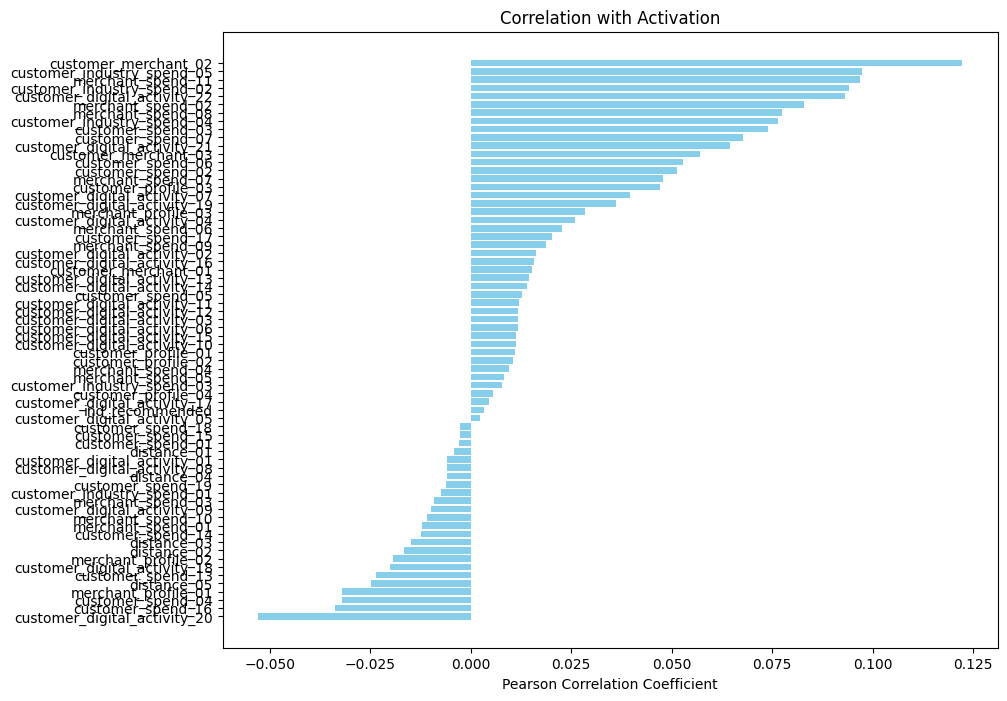

In [14]:
# Assuming `correlation_coefficients` is the output from the function
def visualize_correlations(correlation_coefficients):
    # Unpack the list of tuples
    columns, correlations = zip(*correlation_coefficients)
    
    # Create a bar chart to visualize the correlations
    plt.figure(figsize=(10, 8))
    plt.barh(columns, correlations, color='skyblue')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.title('Correlation with Activation')
    plt.gca().invert_yaxis()  # Invert y-axis to have the largest correlation at the top
    plt.show()

# Visualize the correlation coefficients
visualize_correlations(correlation_coefficients)

In [15]:
results = []
# Loop through each feature in the correlation_coefficients list
for i, (feature, correlation) in enumerate(correlation_coefficients, start=1):
    # Compute the percentage of null values for the feature
    null_percentage = ddf[feature].isnull().mean().compute() * 100
    
    print(f"Feature: {feature}, Correlation: {correlation}, Null_percentage: {null_percentage}")

Feature: customer_merchant_02, Correlation: 0.12232981524927626, Null_percentage: 99.91164334065033
Feature: customer_industry_spend_05, Correlation: 0.09747003854835204, Null_percentage: 47.86749411977683
Feature: merchant_spend_11, Correlation: 0.09689022175514102, Null_percentage: 91.45932233075153
Feature: customer_industry_spend_02, Correlation: 0.09410296522680793, Null_percentage: 47.86749411977683
Feature: customer_digital_activity_22, Correlation: 0.09303001490182232, Null_percentage: 33.722317407275796
Feature: merchant_spend_02, Correlation: 0.08292141565996408, Null_percentage: 20.708001273591826
Feature: merchant_spend_08, Correlation: 0.07755090777774096, Null_percentage: 20.708001273591826
Feature: customer_industry_spend_04, Correlation: 0.07654048306450988, Null_percentage: 47.86749411977683
Feature: customer_spend_03, Correlation: 0.0740170216464072, Null_percentage: 7.708116891134227
Feature: customer_spend_07, Correlation: 0.06780985622212299, Null_percentage: 4.995

In [ ]:
from IPython.display import display, HTML

# Count unique customers
unique_customers = ddf['customer'].nunique().compute()

# Count unique merchants
unique_merchants = ddf['merchant'].nunique().compute()

print(f'Unique customers: {unique_customers}')
print(f'Unique merchants: {unique_merchants}')

### First Look at Customer data

In [ ]:
# Set the number of random customers you want to sample
num_customers = 5  # for example, to sample 5 customers

# Sample 'num_customers' random customers
sample_customers_ddf = ddf['customer'].drop_duplicates().sample(frac=1, random_state=1)
sample_customers = sample_customers_ddf.head(num_customers)

for sample_customer_id in sample_customers:
    # Get data for this customer across all industries
    customer_data = ddf[ddf['customer'] == sample_customer_id].compute()

    # Group by 'merchant_profile_01' and calculate mean for numeric features
    grouped_by_industry = customer_data.groupby('merchant_profile_01').mean()

    # Convert the groupby result into HTML format with CSS for scrolling
    css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
    df_html = grouped_by_industry.to_html()

    # Display the HTML with the CSS style
    display(HTML(css_style + df_html))

### Features describing customer behaviours
customer_profile_03 <br>
customer_digital_activity_02 - Customer logins (number of logins) <br>
customer_profile_04 - Customer Tenure (customer tenure with the business)<br>
customer_digital_activity_01 - Customer emails (should be not related)<br>  
customer_digital_activity_03 - Customer offers<br>
customer_digital_activity_05<br>
customer_digital_activity_06<br>
customer_digital_activity_07 (high % null)<br>
customer_digital_activity_08 (high % null)<br>
customer_digital_activity_09 (high % null)<br>
__customer_digital_activity_07, 8, 9 are related (if one is null, the other 2 columns will be null too) can be removed from training__  <br> 
customer_digital_activity_10<br>
customer_digital_activity_13<br>
customer_digital_activity_14<br>
customer_digital_activity_15<br>
customer_digital_activity_16 <br>
customer_digital_activity_17<br>
customer_merchant_01 (tentative) <br>
customer_merchant_02 (tentative)<br>
__customer_merchant_01 and customer_merchant_02 are related to each other, it's the previous transactions between customer and the merchant__


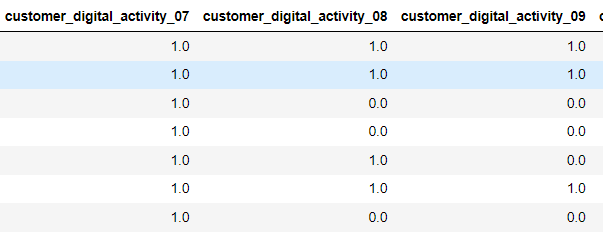

In [42]:
# Filter the DataFrame for rows where any of the specified columns have non-null values
non_null_customers = ddf[ddf[['customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09']].notnull().any(axis=1)]

# Drop duplicates to get unique customers
unique_non_null_customers = non_null_customers.drop_duplicates(subset='customer')

# Compute to get the result in memory as Pandas DataFrame (if manageable size)
unique_non_null_customers_pd = unique_non_null_customers.compute()

# Convert the groupby result into HTML format with CSS for scrolling
css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
df_html = unique_non_null_customers_pd.to_html()

# Display the HTML with the CSS style
display(HTML(css_style + df_html))

### Things to study


customer_digital_activity_04
customer_industry_spend_01
customer_industry_spend_02
customer_industry_spend_03
customer_industry_spend_04
customer_industry_spend_05

# when customer_spend_13,16 is null, this is confirm null, but it can be null when 13,16 is not null
customer_spend_14
customer_spend_04

## quite independent, KIV
customer_spend_17

### if not null, then linked together
customer_spend_01
customer_spend_02

### When not null, can be diff value 
customer_spend_13	
customer_spend_16

### Cosntant to the customer
customer_spend_03
customer_spend_05
customer_spend_06
customer_spend_07
customer_spend_15
customer_profile_01
customer_profile_02
customer_profile_03
customer_profile_04 - Customer Tenure (customer tenure with the business)
customer_digital_activity_01 - Customer emails (should be not related)
customer_digital_activity_02 - Customer logins (number of logins)
customer_digital_activity_03 - Customer offers
customer_digital_activity_05
customer_digital_activity_06
customer_digital_activity_07 (high % null)
customer_digital_activity_08 (high % null)
customer_digital_activity_09 (high % null)
customer_digital_activity_07, 8, 9  (linked together) 
customer_digital_activity_10
customer_digital_activity_13
customer_digital_activity_14
customer_digital_activity_15
customer_digital_activity_16
customer_digital_activity_17

customer_merchant_01 (tentative)
customer_merchant_02 (tentative)
customer_merchant_01 and customer_merchant_02 (linked together) 

### non null 
distance_05

### distance are all linked together
distance_01
distance_02
distance_03
customer_spend_13
customer_spend_16
customer_spend_18
customer_spend_19

In [4]:
customer_data = ddf[ddf['customer'] == 168972].compute()
html_data = customer_data.to_html()

# Use IPython display function to show the DataFrame as HTML
display(HTML(html_data))

In [4]:
# Filter the DataFrame for rows where any of the specified columns have non-null values
non_null_customers = ddf[ddf[['customer_spend_01', 'customer_spend_02']].notnull().any(axis=1)]

# Drop duplicates to get unique customers
unique_non_null_customers = non_null_customers.drop_duplicates(subset='customer')

# Compute to get the result in memory as Pandas DataFrame (if manageable size)
unique_non_null_customers_pd = unique_non_null_customers.head()

# Convert the groupby result into HTML format with CSS for scrolling
css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
df_html = unique_non_null_customers_pd.to_html()

# Display the HTML with the CSS style
display(HTML(css_style + df_html))

In [5]:
columns = ['customer_spend_01', 'customer_spend_02', 'customer_spend_04', 'customer_spend_13', 'customer_spend_14', 'customer_spend_16', 'customer_spend_17']
customer_spend = customer_data[columns]
html_data = customer_spend.to_html()

display(HTML(html_data))

In [18]:
not_null_customer_da_04 = ddf[ddf['customer_digital_activity_04'].notnull()]

# Removing duplicate entries based on 'customer'
unique_non_null_customers = not_null_customer_da_04.drop_duplicates(subset='customer').compute()

# CSS style for scrolling
css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"

# Convert the DataFrame to HTML
df_html = unique_non_null_customers.to_html()

# Display the HTML with the CSS style
display(HTML(css_style + df_html))

In [ ]:
# Filter the DataFrame for rows where any of the specified columns have non-null values
non_null_customers = ddf[ddf[['customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09']].notnull().any(axis=1)]

non_null_customers_count = non_null_customers.shape[0].compute()

print(f"Non null customer count: {non_null_customers_count}")

In [ ]:
# Assuming 'ddf' is your Dask DataFrame

# Filter the DataFrame to include only rows where all three specified columns are not null
rows_with_all_activities_non_null = ddf[
    ddf[['customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09']].notnull().all(axis=1)
]

# Calculate the percentage of those rows where 'activation' is 1 (true)
percentage_activation_non_null = (rows_with_all_activities_non_null['activation'].mean()).compute()

print(f"Percentage of activation among rows with all three activities non-null: {percentage_activation_non_null:.3f}")
print(f"Percentage of activation (all): {0.005724948973743043}")

### Findings
The activation rate for rows with non-null values in customer_digital_activity_07, customer_digital_activity_08, and customer_digital_activity_09 is 3.73%, significantly higher than the overall activation rate of 0.57%. This suggests that these digital activities are associated with a markedly higher likelihood of activation, indicating their potential importance in predictive modeling and targeted marketing strategies.

In [ ]:
# Filter the DataFrame for rows where all of the specified columns are null
null_customers = ddf[ddf[['customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09']].isnull().all(axis=1)]
null_customers_count = null_customers.shape[0].compute()

# Compute the mean of the activation column for these filtered rows
activation_mean_null_customers = null_customers['activation'].mean().compute()

print(null_customers_count)
# Print the mean activation for customers with all specified columns null
print(f"Mean activation for customers with all specified digital activities null: {activation_mean_null_customers}")

In [ ]:
#A: Number of activated users with digital activities
#B: Number of not activated users with digital activities
#C: Number of activated users without digital activities
#D: Number of not activated users without digital activities

A = non_null_customers_count * percentage_activation_non_null
B = non_null_customers_count - A
C =  null_customers_count * activation_mean_null_customers
D = null_customers_count - C

print(f"A: {A}")
print(f"B: {B}")
print(f"C: {C}")
print(f"D: {D}")

from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Hypothetical counts for the chi-square test
table = np.array([[A, B], [C, D]])
chi2, p_value_chi, dof, expected = chi2_contingency(table)
print(f"Chi-square test p-value: {p_value_chi}")

# Counts and sample sizes for the proportion test
count = np.array([A, C])  # Number of successes (activated) in each group
nobs = np.array([A+B, C+D])  # Total number of observations in each group

stat, p_value_prop = proportions_ztest(count, nobs)
print(f"Proportion test Z-test p-value: {p_value_prop}")

### Findings 
This indicates that there is a statistically significant difference in activation rates between the groups of customers with non-null and null values in the specified columns (customer_digital_activity_07, customer_digital_activity_08, customer_digital_activity_09).

In [ ]:
# Define a function to compute correlation for a given column
def compute_correlation(filtered_ddf, column_name):
    # Compute correlation of the specified column with 'activation'
    correlation = filtered_ddf['activation'].corr(filtered_ddf[column_name]).compute()
    return correlation

# Compute correlations
correlation_activity_07 = compute_correlation(non_null_customers, 'customer_digital_activity_07')
correlation_activity_08 = compute_correlation(non_null_customers, 'customer_digital_activity_08')
correlation_activity_09 = compute_correlation(non_null_customers, 'customer_digital_activity_09')

print(correlation_activity_07)
print(correlation_activity_08)
print(correlation_activity_09)



### if got time, can find out if high value of either customer_digital_activity_07,08,09 linked to higher activation, now just assume we create one new column to check if null or not null

In [40]:
# Calculate the highest value for each specified column
max_activity_07 = ddf['customer_digital_activity_07'].max().compute()
max_activity_08 = ddf['customer_digital_activity_08'].max().compute()
max_activity_09 = ddf['customer_digital_activity_09'].max().compute()

# Calculate the highest value for each specified column
min_activity_07 = ddf['customer_digital_activity_07'].min().compute()
min_activity_08 = ddf['customer_digital_activity_08'].min().compute()
min_activity_09 = ddf['customer_digital_activity_09'].min().compute()

# Print the highest values
print(f"Highest value in 'customer_digital_activity_07': {max_activity_07}")
print(f"Highest value in 'customer_digital_activity_08': {max_activity_08}")
print(f"Highest value in 'customer_digital_activity_09': {max_activity_09}")

print(f"Minimum value in 'customer_digital_activity_07': {min_activity_07}")
print(f"Minimum value in 'customer_digital_activity_08': {min_activity_08}")
print(f"Minimum value in 'customer_digital_activity_09': {min_activity_09}")

Highest value in 'customer_digital_activity_07': 6.0
Highest value in 'customer_digital_activity_08': 4.0
Highest value in 'customer_digital_activity_09': 3.0
Minimum value in 'customer_digital_activity_07': 1.0
Minimum value in 'customer_digital_activity_08': 0.0
Minimum value in 'customer_digital_activity_09': 0.0


customer_digital_activity_07, customer_digital_activity_08, customer_digital_activity_09 might be rating

In [ ]:
# Define a function to add a single binary indicator column
def add_combined_indicator(df):
    # Check if any of the specified columns are non-null and add a binary indicator column
    df['digital_activity_indicator'] = df[['customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09']].notnull().any(axis=1).astype(int)
    return df

# Apply the function to each partition of the Dask DataFrame
ddf_augmented = ddf.map_partitions(add_combined_indicator)

## Now look at customer_merchant_01, customer_merchant_02

In [ ]:
non_null_customer_merchant = ddf[ddf[['customer_merchant_01', 'customer_merchant_02']].notnull().any(axis=1)]

non_null_customer_merchant_count = non_null_customer_merchant.shape[0].compute()

print(f"Non null customer count: {non_null_customer_merchant_count}")

non_null_customer_merchant_pd = non_null_customer_merchant.compute()

# Convert the groupby result into HTML format with CSS for scrolling
css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
df_html = non_null_customer_merchant_pd.to_html()

# Display the HTML with the CSS style
display(HTML(css_style + df_html))

In [ ]:
previous_transactions_activation = ddf[
    ddf[['customer_merchant_01', 'customer_merchant_02']].notnull().any(axis=1)
]['activation']

# Calculate the total number of activations where there has been a previous transaction
total_activations_with_previous = previous_transactions_activation.sum().compute()

# Calculate the total number of rows where there has been a previous transaction
total_rows_with_previous = previous_transactions_activation.count().compute()

# Calculate the percentage of activations among rows with previous transactions
percentage_of_activation = (total_activations_with_previous / total_rows_with_previous) * 100

percentage_of_activation

### Findings
76.28% activation rate among rows with previous transactions between customers and merchants, it's clear that the presence of a previous transaction is a strong indicator of activation.

In [ ]:
ddf_augmented['customer_merchant_01'] = ddf_augmented['customer_merchant_01'].fillna(0)
ddf_augmented['customer_merchant_02'] = ddf_augmented['customer_merchant_02'].fillna(0)

display(HTML(ddf_augmented.head().to_html()))

In [ ]:
correlation = ddf_augmented['activation'].corr(ddf_augmented['digital_activity_indicator']).compute()

# The result will be a 2x2 DataFrame showing the correlation coefficients between the two variables
print(correlation)

### Visualize missing values

In [3]:
import missingno as msno
sample_pdf = ddf.sample(frac=0.1).compute()

<Axes: >

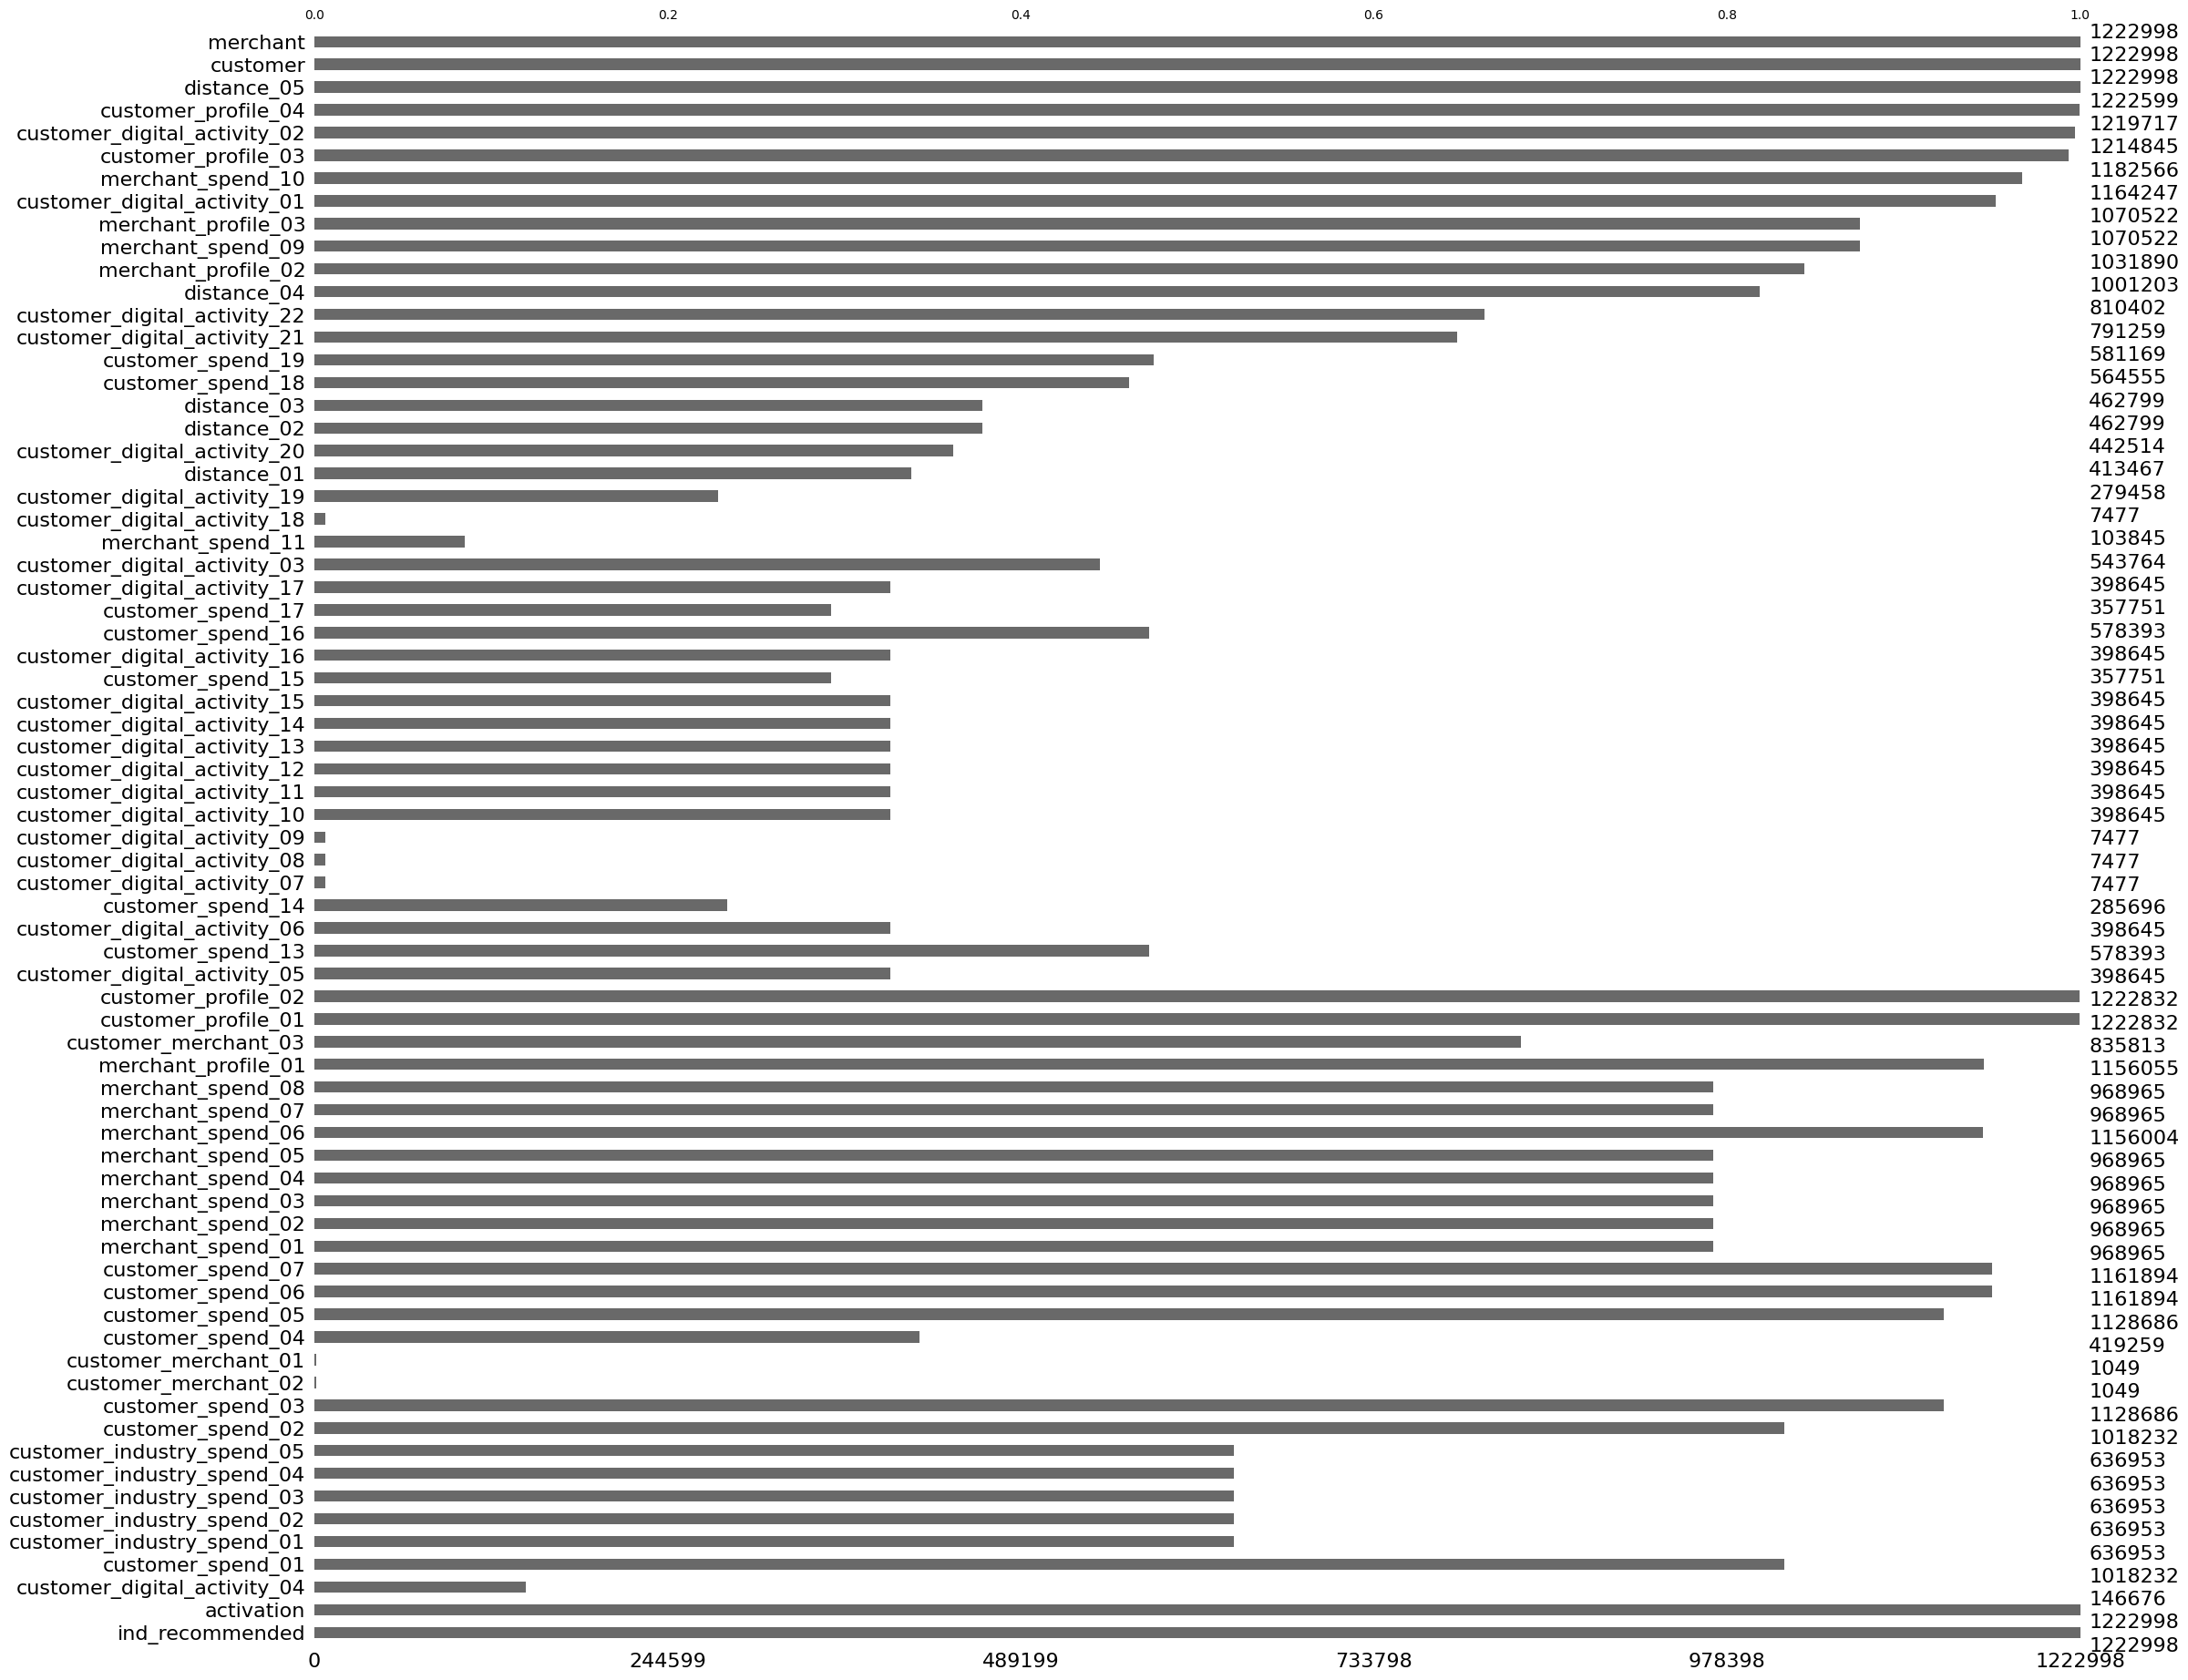

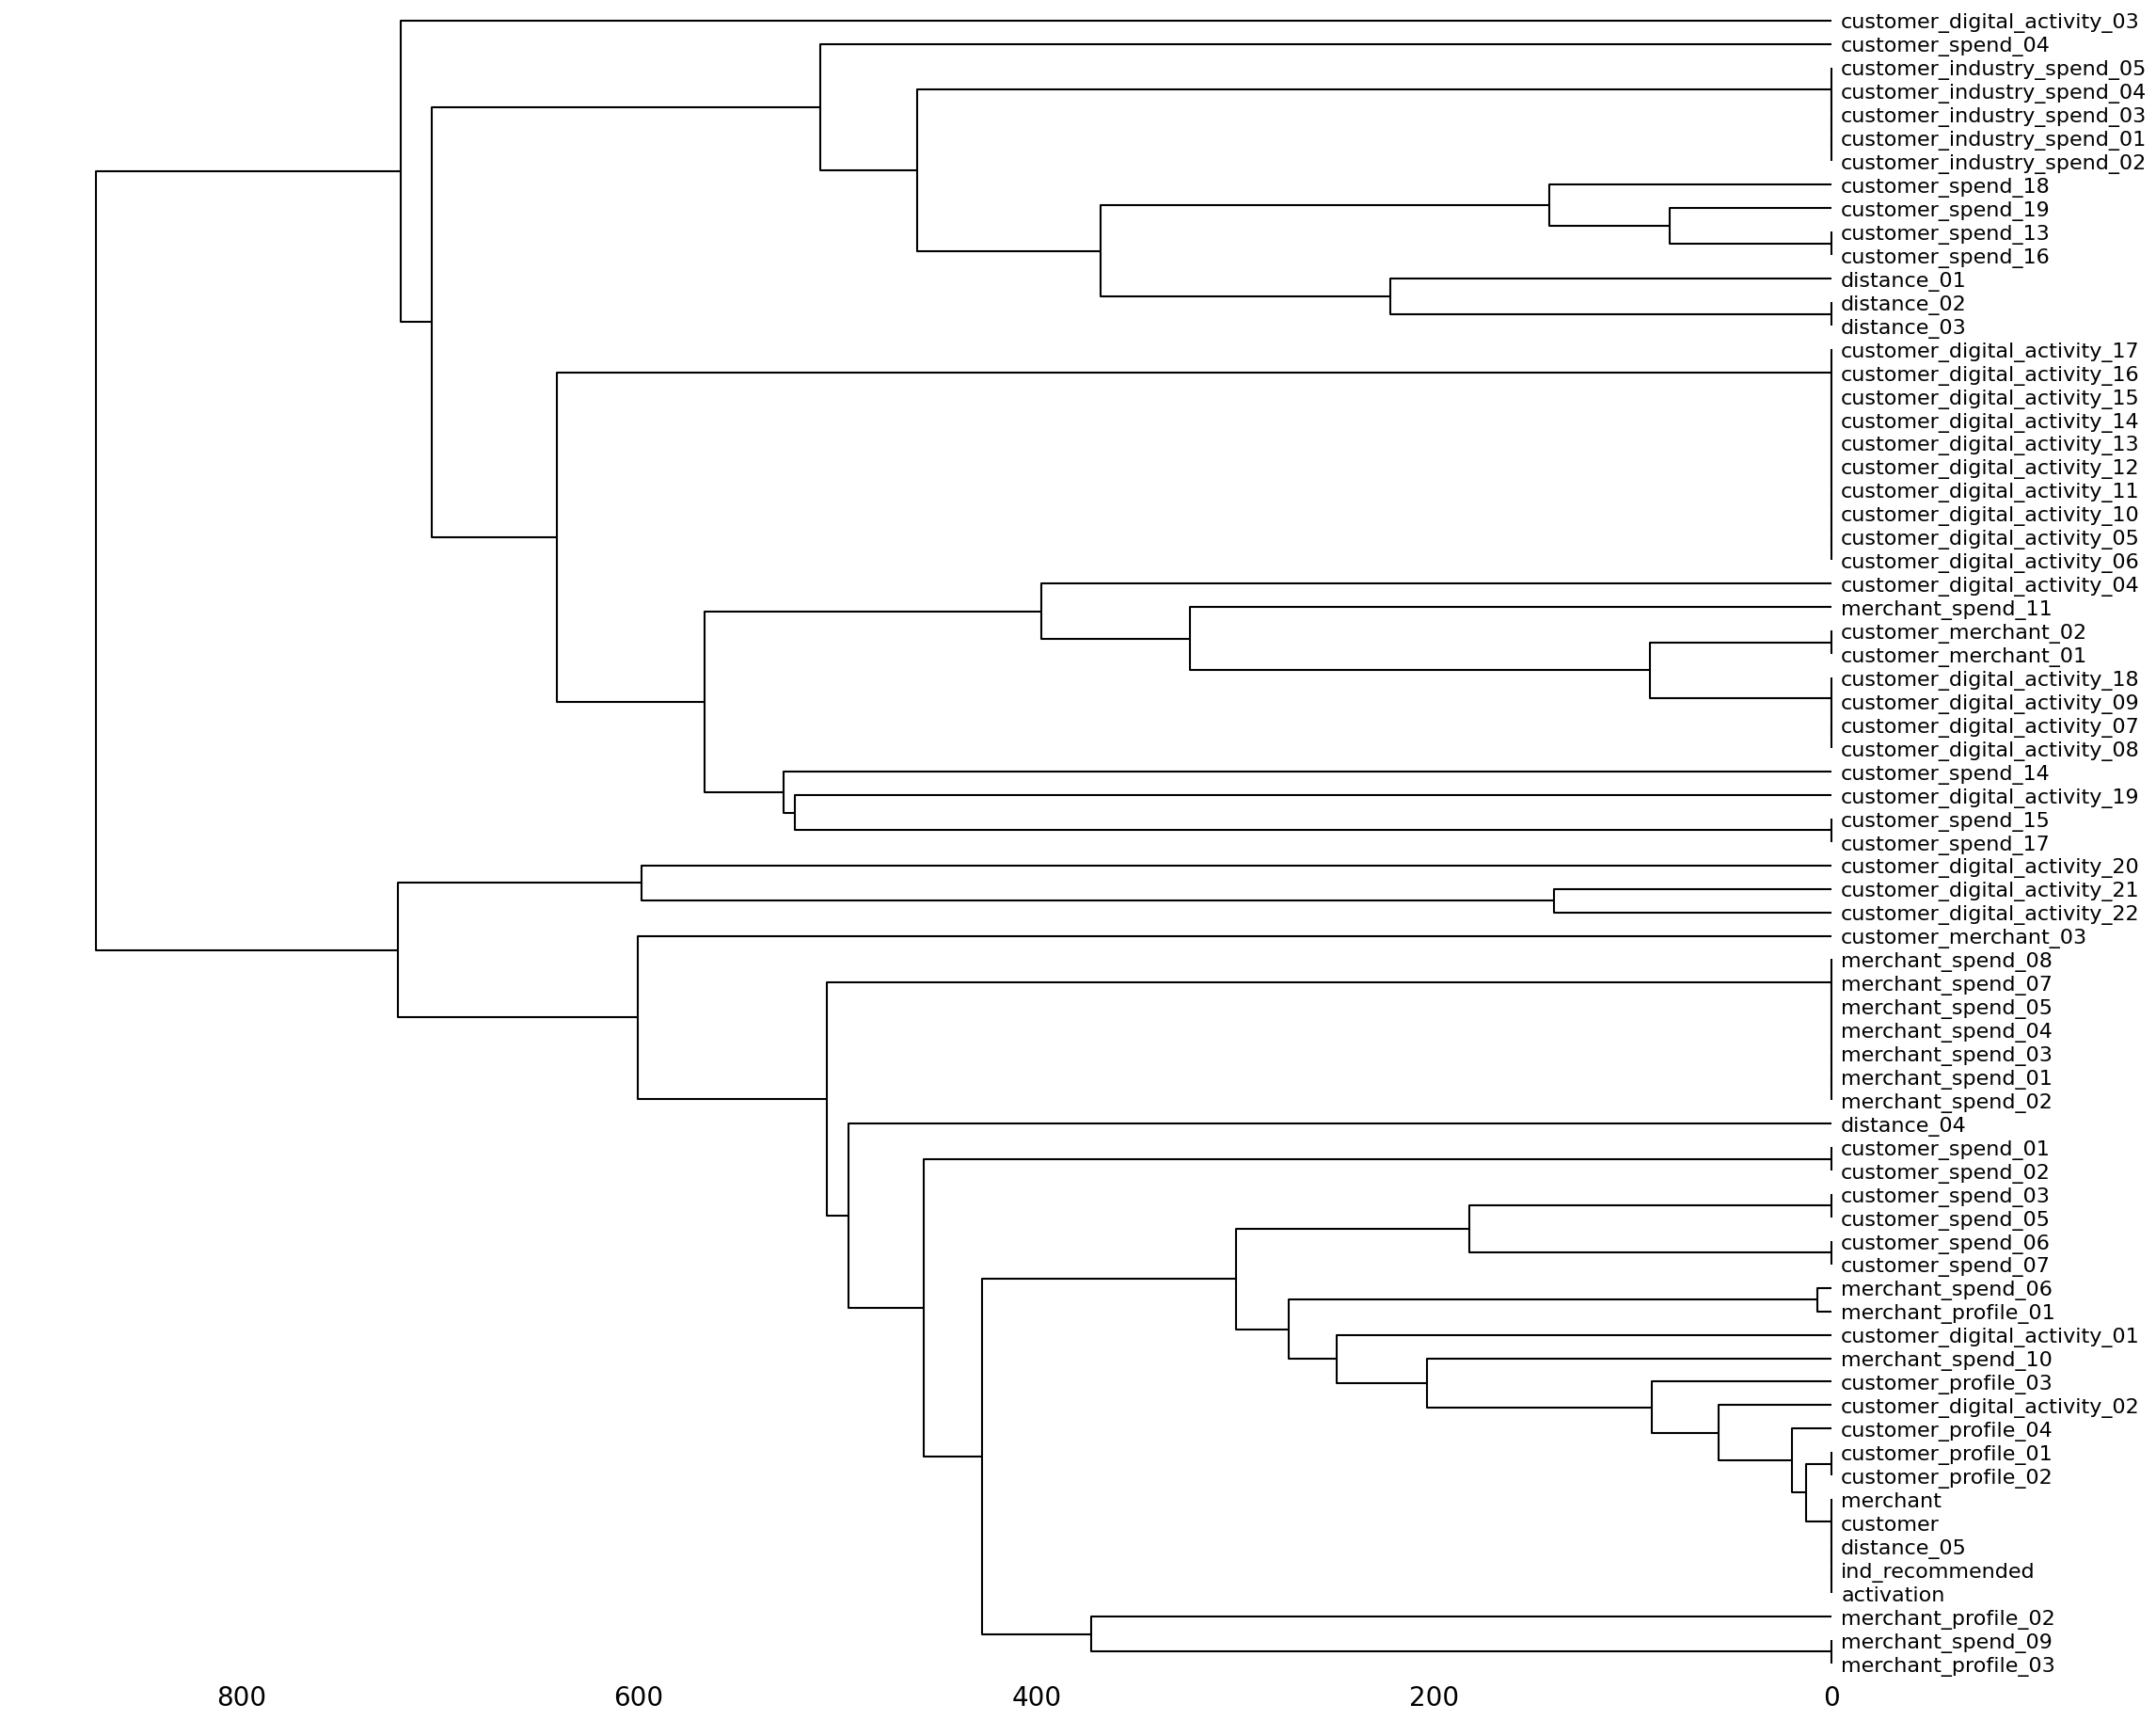

In [7]:
msno.bar(sample_pdf)

msno.dendrogram(sample_pdf)

## Group by merchant

In [ ]:
# Set the number of random customers you want to sample
num_merchants = 5  # for example, to sample 5 customers

# Sample 'num_customers' random customers
sample_merchant_ddf = ddf['merchant'].drop_duplicates().sample(frac=1, random_state=9)
sample_merchants = sample_merchant_ddf.head(num_merchants)

for sample_merchant_id in sample_merchants:
    # Get data for this customer across all industries
    merchant_data = ddf[ddf['merchant'] == sample_merchant_id].compute()

    # Group by 'merchant_profile_01' and calculate mean for numeric features
    ##grouped_by_industry = customer_data.groupby('merchant_profile_01').mean()

    # Convert the groupby result into HTML format with CSS for scrolling
    css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
    df_html = merchant_data.to_html()

    # Display the HTML with the CSS style
    display(HTML(css_style + df_html))

### Features describing customer behaviours
merchant_profile_02 <br>
merchant_spend_09 <br>
merchant_profile_03 <br>
merchant_spend_10 <br> 
<br><br> 
customer_merchant_01 and customer_merchant_02 high null

In [ ]:
min_value_customer_merchant_01 = ddf['customer_merchant_01'].min().compute()
min_value_customer_merchant_02 = ddf['customer_merchant_02'].min().compute()

print(f"min_value_customer_merchant_01: {min_value_customer_merchant_01}")
print(f"min_value_customer_merchant_02: {min_value_customer_merchant_02}")

In [ ]:
non_null_merchants = ddf[ddf[['customer_merchant_01', 'customer_merchant_02']].notnull().any(axis=1)]

# Compute to get the result in memory as Pandas DataFrame (if manageable size)
non_null_merchants_pd = non_null_merchants.compute()

# Convert the groupby result into HTML format with CSS for scrolling
css_style = "<style>div.output_scroll {height: 250px; width:100%; overflow: scroll;}</style>"
df_html = non_null_merchants_pd.to_html()

# Display the HTML with the CSS style
display(HTML(css_style + df_html))


In [ ]:
## Stop her

In [ ]:
def filter_columns_by_correlation(correlation_coefficients, threshold):

    # Filter the columns based on the threshold
    filtered_columns = [column for column, coeff in correlation_coefficients if abs(coeff) >= threshold]
    
    return filtered_columns

threshold = 0.05
filtered_columns = filter_columns_by_correlation(correlation_coefficients, threshold)

print("Filtered columns:", filtered_columns)


**customer_merchant_02**: Customer Merchant transactions <br>
**merchant_spend_02**: Merchant's customers <br>
**merchant_transaction_08**: Merchant's transactions <br>
**customer_industry_spend_04**: Customer Industry transactions <br>
**customer_spend_03**: Customer unique merchants <br>
**customer_spend_07**: Days with spend <br>
**customer_merchant_03**: similarity <br>
**customer_spend_06**: customer transactions <br>


In [ ]:
filtered_correlations = [item for item in correlation_coefficients if item[0] in filtered_columns]

visualize_correlations(filtered_correlations)

In [ ]:
for column in filtered_columns:
    # Convert the specific column to a Pandas DataFrame
    # Note: Ensure this operation is feasible memory-wise for your dataset
    pandas_df = ddf[column].compute().to_frame()
    
    # Now that you have the column in Pandas, you can easily plot a boxplot
    plt.figure(figsize=(10, 6))
    pandas_df.boxplot(column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Value')
    plt.show()

In [ ]:
def count_outliers_proportion(ddf, column_name):
    # Compute the first and third quartiles
    q1 = ddf[column_name].quantile(0.25).compute()
    q3 = ddf[column_name].quantile(0.75).compute()
    iqr = q3 - q1
    
    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Count outliers
    outliers_count = ((ddf[column_name] < lower_bound) | (ddf[column_name] > upper_bound)).sum().compute()
    
    # Count total rows
    total_rows = ddf[column_name].count().compute()
    
    # Calculate the proportion of outliers
    proportion_outliers = outliers_count / total_rows
    
    return outliers_count, proportion_outliers

for column in filtered_columns: 
    outliers_count, proportion_outliers = count_outliers_proportion(ddf, column)
    print(f'Number of outliers in {column}: {outliers_count}')
    print(f'Proportion of outliers in {column}: {proportion_outliers:.2%}')